In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

In [2]:
cars_df = pd.read_csv(filepath_or_buffer='cars.csv')
cars_df.head()

,make,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [3]:
numpy_mpg = np.array(cars_df['mpg'])
print(numpy_mpg)

[21.  21.  22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 17.8 16.4 17.3 15.2
 10.4 10.4 14.7 32.4 30.4 33.9 21.5 15.5 15.2 13.3 19.2 27.3 26.  30.4
 15.8 19.7 15.  21.4]


In [4]:
np.count_nonzero(numpy_mpg < 15)

5

In [5]:
print(cars_df.loc[cars_df['mpg'] < 15, 'model'])

6              Duster 360
14     Cadillac Fleetwood
15    Lincoln Continental
16      Chrysler Imperial
23             Camaro Z28
Name: model, dtype: object


In [6]:
print(np.unique(cars_df['make']).size)
print(np.unique(cars_df['make']))

22
['AMC' 'Cadillac' 'Camaro' 'Chrysler' 'Datsun' 'Dodge' 'Duster' 'Ferrari'
 'Fiat' 'Ford' 'Honda' 'Hornet' 'Lincoln' 'Lotus' 'Maserati' 'Mazda'
 'Merc' 'Pontiac' 'Porsche' 'Toyota' 'Valiant' 'Volvo']


In [7]:
cars_df['make'].value_counts()

make
Merc        7
Mazda       2
Fiat        2
Toyota      2
Hornet      2
Duster      1
Camaro      1
Maserati    1
Ferrari     1
Ford        1
Lotus       1
Porsche     1
Pontiac     1
AMC         1
Valiant     1
Dodge       1
Datsun      1
Honda       1
Chrysler    1
Lincoln     1
Cadillac    1
Volvo       1
Name: count, dtype: int64

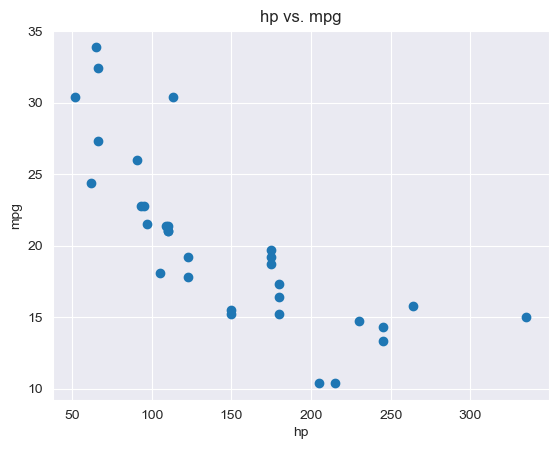

In [8]:
sns.set_style('darkgrid')

plt.scatter(x=cars_df['hp'], y=cars_df['mpg'])
plt.xlabel('hp')
plt.ylabel('mpg')
plt.title('hp vs. mpg')

plt.show()

In [9]:
X = np.array(cars_df['hp'])
Y = np.array(cars_df['mpg'])

X = X.reshape((len(X), 1))
Y = Y.reshape((len(Y), 1))

Xa = np.column_stack((np.ones_like(X), X))

theta = np.linalg.inv(Xa.T @ Xa) @ Xa.T @ Y

theta_0 = theta[0][0]
theta_1 = theta[1][0]

print(f"Theta_0: {theta_0}")
print(f"Theta_1: {theta_1}")

Theta_0: 30.0988605396225
Theta_1: -0.06822827807156365


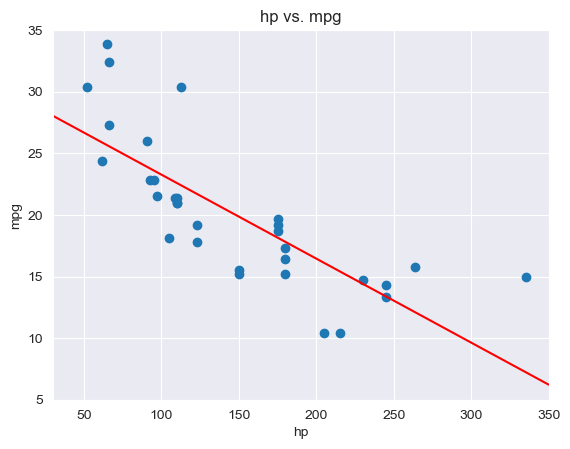

In [10]:
Xspace = np.linspace(30, 350)

plt.scatter(x=cars_df['hp'], y=cars_df['mpg'])

plt.xlabel('hp')
plt.ylabel('mpg')
plt.axis([30, 350, 5, 35])
plt.title('hp vs. mpg')

plt.plot(Xspace, Xspace * theta_1 + theta_0, color="red")

plt.show()

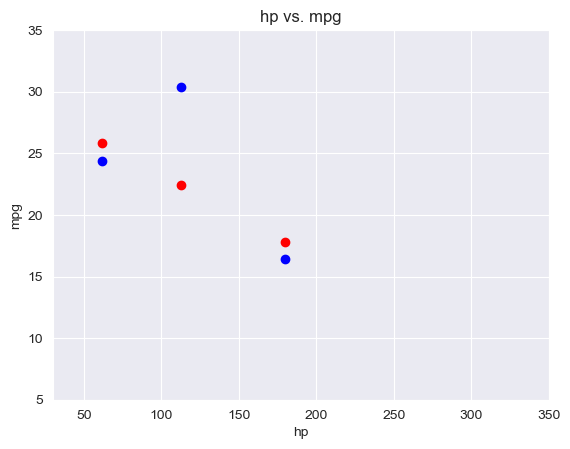

In [11]:
Random_X_index = np.random.choice(len(X), size = 3, replace = False)
Random_X = X[Random_X_index]

plt.xlabel('hp')
plt.ylabel('mpg')
plt.axis([30, 350, 5, 35])
plt.title('hp vs. mpg')

plt.scatter(Random_X, Random_X * theta_1 + theta_0, color="red") #Predicted
plt.scatter(Random_X, Y[Random_X_index], color="blue") #Actual

In [13]:
predicted_mpg = Xa @ theta

u_y = np.mean(Y)
real_summation = np.sum((Y - u_y)**2)

predicted_summation = np.sum((Y - predicted_mpg)**2)

R2 = 1 - (predicted_summation / real_summation)

print(f'R2 Score: {R2}')

R2 Score: 0.602437341423934
The R2 score of 0.6024 suggests that there is a moderate correlation between the hp of a car and its mileage
